In [25]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import sqrt
import scipy.constants as c
from lmfit import Minimizer, report_fit,create_params
from lmfit import Minimizer, report_fit, create_params
from lmfit.lineshapes import lorentzian


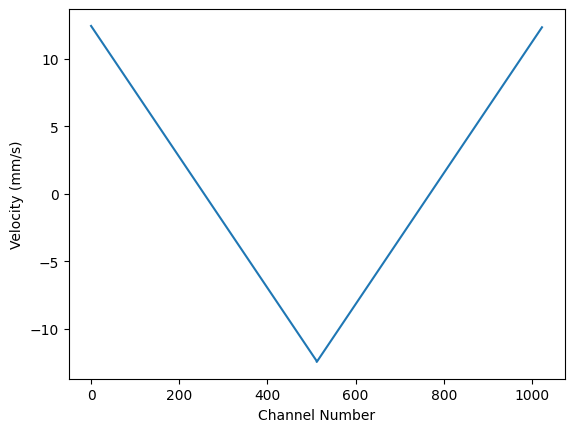

In [26]:
velocity_calib = np.loadtxt('fit_results.csv', delimiter=',',skiprows=1)
velocity = velocity_calib[:,1]
velocity_uncertainty = velocity_calib[:,2]
plt.plot(velocity*10**3)
plt.ylabel('Velocity (mm/s)')
plt.xlabel('Channel Number')


def objective_with_xerr(params, x, y, yerr, xerr):
    model = peak_model(params, x)
    dmodel_dx = np.gradient(model) / np.gradient(x)
    dmodel = np.sqrt(yerr**2 + (xerr*dmodel_dx)**2)
    return (model - y) / dmodel


[[0.000e+00 0.000e+00]
 [1.000e+00 2.850e+02]
 [2.000e+00 2.940e+02]
 ...
 [1.021e+03 0.000e+00]
 [1.022e+03 0.000e+00]
 [1.023e+03 0.000e+00]]


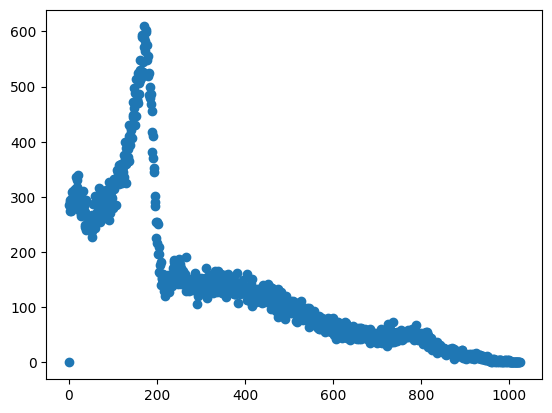

In [27]:
spectrum = np.loadtxt('data/EnergySpectrum_2025-12-15_09-53-55.txt', delimiter = ' ', skiprows = 0)
print(spectrum)
plt.scatter(spectrum[:,0], spectrum[:,1])

In [1]:
import numpy as np

# Read the file line by line to determine structure
with open('data/FePO4.txt', 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

print(f"Dimensions: {n_rows} rows × {n_cols} columns")

# Read as 2D numpy array
data_2d = np.loadtxt('data/FePO4.txt').reshape(n_rows, n_cols)

print(f"Array shape: {data_2d.shape}")
print(f"Data type: {data_2d.dtype}")
print(f"\nFirst 5×5 block:\n{data_2d[:5, :5]}")


Dimensions: 128 rows × 1024 columns
Array shape: (128, 1024)
Data type: float64

First 5×5 block:
[[24. 20. 13. 13. 17.]
 [19. 19. 17. 25. 23.]
 [14. 20. 21. 19. 37.]
 [25. 25. 24. 14. 18.]
 [30. 31. 21. 18. 20.]]


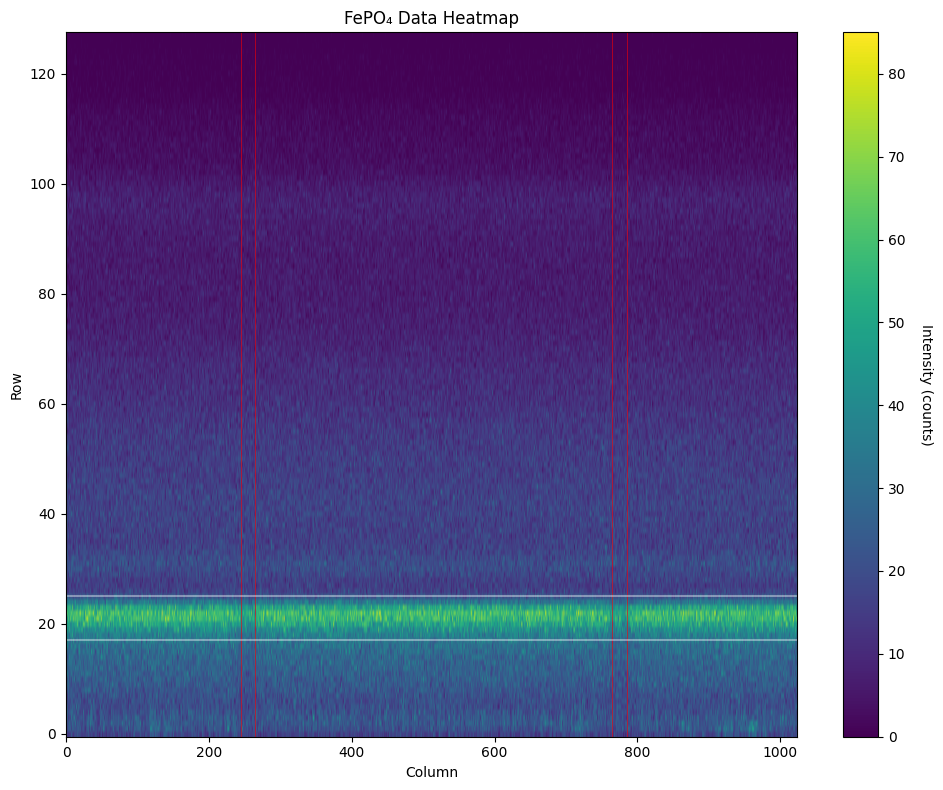

Array shape: (128, 1024)
Intensity range: 0.0 - 85.0


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file line by line to determine structure
with open('data/FePO4.txt', 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

# Read as 2D numpy array
data_2d = np.loadtxt('data/FePO4.txt').reshape(n_rows, n_cols)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(data_2d, cmap='viridis', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity (counts)', rotation=270, labelpad=20)

# Labels
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('FePO₄ Data Heatmap')

plt.tight_layout()
plt.axvline(265, color = 'red', linewidth = 0.4)
plt.axvline(245, color = 'red', linewidth = 0.4)
plt.axvline(765, color = 'red', linewidth = 0.4)
plt.axvline(785, color = 'red', linewidth = 0.4)
plt.axhline(17,color= "white",alpha=0.4)
plt.axhline(25,color= "white",alpha=0.4)
plt.show()

print(f"Array shape: {data_2d.shape}")
print(f"Intensity range: {data_2d.min()} - {data_2d.max()}")


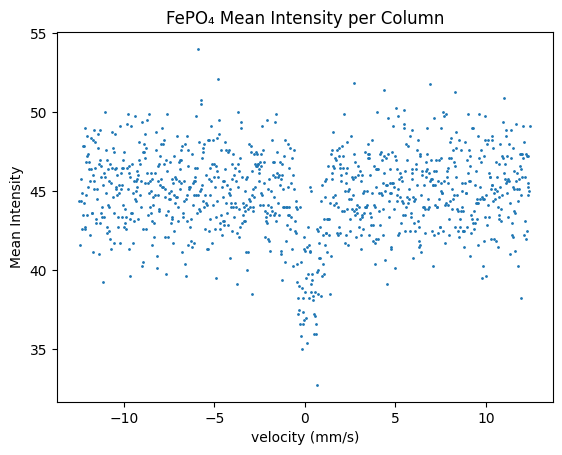

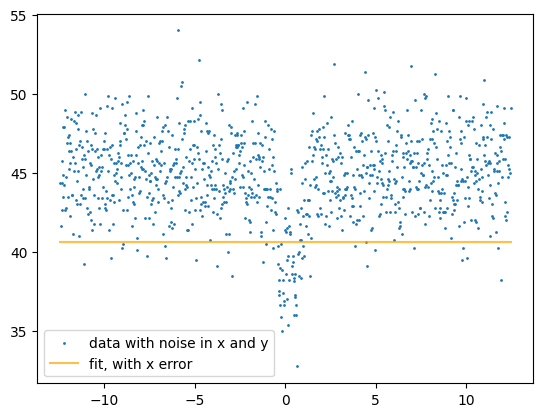

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 83
    # variables        = 8
    chi-square         = 22.3184482
    reduced chi-square = 0.29757931
    Akaike info crit   = -93.0144408
    Bayesian info crit = -73.6637159
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:    -30.8496220 (init = -10)
    cen:    -4978.07363 (init = -0.0001)
    sig:    -1.49585447 (init = 1)
    amp2:   -30.8499981 (init = -10)
    cen2:    5340.70148 (init = 0.001)
    sig2:   -1.49588740 (init = 1)
    slope:   0.00000000 (init = 0)
    offset:  40.5940548 (init = 45)
None


In [30]:
# Calculate mean along axis 0 (rows) for each column
y = np.mean(data_2d[17:25,:], axis=0)

plt.scatter(velocity*10**3, y, s=1)
plt.xlabel('velocity (mm/s)')
plt.ylabel('Mean Intensity')
plt.title('FePO₄ Mean Intensity per Column')
plt.show()


def peak_model(params, x):
    amp = params['amp'].value
    cen = params['cen'].value
    sig = params['sig'].value
    offset = params['offset'].value
    amp2 = params['amp2'].value
    cen2 = params['cen2'].value
    sig2 = params['sig2'].value
    #slope = params['slope'].value
    #model = offset + slope*x +  lorentzian(x, amp, cen, sigma=sig)
    model = offset +  lorentzian(x, amp, cen, sigma=sig) +lorentzian(x, amp2, cen2, sigma=sig2)
    
    return model


params = create_params(amp= -10, cen=-1e-4, sig=1, amp2= -10, cen2=1e-3, sig2=1, slope=0, offset=45)

mini2 = Minimizer(objective_with_xerr, params, fcn_args=(velocity[np.where(np.abs(velocity) <0.001)], y[np.where(np.abs(velocity) <0.001)], np.sqrt(y)[np.where(np.abs(velocity) <0.001)], velocity_uncertainty[np.where(np.abs(velocity) <0.001)]))
result2 = mini2.minimize()

bestfit2 = peak_model(result2.params, velocity)

plt.scatter(velocity*10**3, y,s=1, label='data with noise in x and y')
plt.plot(velocity*10**3, bestfit2, label='fit, with x error',color="orange",alpha=0.7)
plt.legend()
plt.show()

print(report_fit(result2))

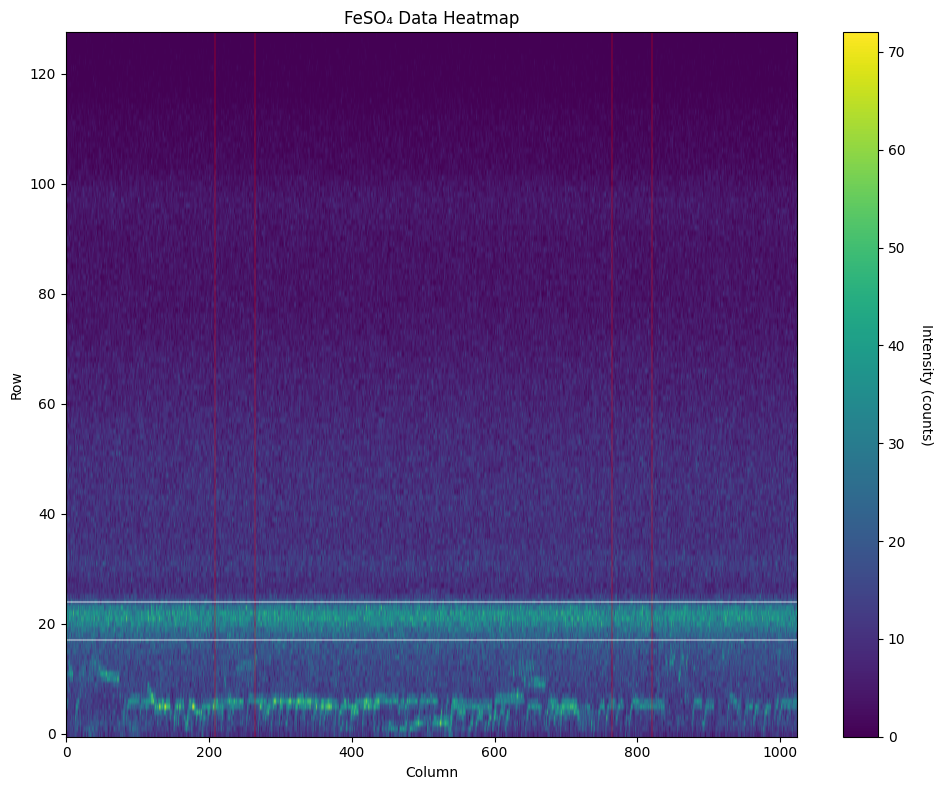

Array shape: (128, 1024)
Intensity range: 0.0 - 72.0


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file line by line to determine structure
with open('data/FeSO4.txt', 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

# Read as 2D numpy array
data_2d = np.loadtxt('data/FeSO4.txt').reshape(n_rows, n_cols)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(data_2d, cmap='viridis', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity (counts)', rotation=270, labelpad=20)

# Labels
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('FeSO₄ Data Heatmap')

plt.tight_layout()
plt.axvline(208, color = 'red', linewidth = 0.3)
plt.axvline(265, color = 'red', linewidth = 0.3)
plt.axvline(765, color = 'red', linewidth = 0.3)
plt.axvline(820, color = 'red', linewidth = 0.3)
plt.axhline(17,color= "white",alpha=0.4)
plt.axhline(24,color= "white",alpha=0.4)

plt.show()

print(f"Array shape: {data_2d.shape}")
print(f"Intensity range: {data_2d.min()} - {data_2d.max()}")


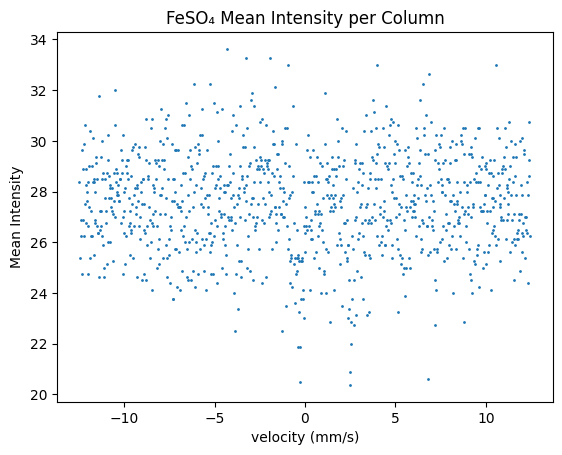

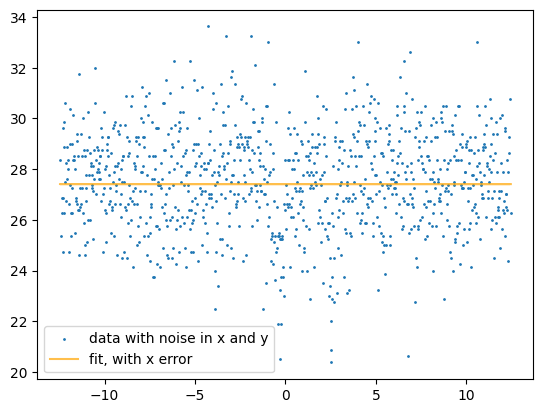

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 384
    # data points      = 1024
    # variables        = 8
    chi-square         = 146.152930
    reduced chi-square = 0.14385131
    Akaike info crit   = -1977.54191
    Bayesian info crit = -1938.09013
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:    -5.07054231 (init = -8)
    cen:    -1.8889e-06 (init = 0)
    sig:     0.95462436 (init = 1)
    amp2:   -5.02389513 (init = -8)
    cen2:    0.00398269 (init = 0.0025)
    sig2:    0.93771475 (init = 1)
    slope:   0.00000000 (init = 0)
    offset:  30.8048590 (init = 28)
None


In [32]:
# Calculate mean along axis 0 (rows) for each column
y = np.mean(data_2d[17:25,:], axis=0)

plt.scatter(velocity*10**3, y, s=1)
plt.xlabel('velocity (mm/s)')
plt.ylabel('Mean Intensity')
plt.title('FeSO₄ Mean Intensity per Column')
plt.show()


def peak_model(params, x):
    amp = params['amp'].value
    cen = params['cen'].value
    sig = params['sig'].value
    offset = params['offset'].value
    amp2 = params['amp2'].value
    cen2 = params['cen2'].value
    sig2 = params['sig2'].value
    #slope = params['slope'].value
    #model = offset + slope*x +  lorentzian(x, amp, cen, sigma=sig)
    model = offset +  lorentzian(x, amp, cen, sigma=sig) +lorentzian(x, amp2, cen2, sigma=sig2)
    
    return model


params = create_params(amp={"value": -8, "min": -10, "max": -5}, cen={"value": 0, "min": -1e-3, "max": 0}, sig={"value": 1, "min": 1e-5, "max": 1}, 
                       amp2={"value": -8, "min": -10, "max": -5}, cen2={"value": 2.5e-3, "min": 2e-3, "max": 4e-3}, sig2={"value": 1, "min": 1e-5, "max": 1}, 
                       slope=0, offset={"value": 28, "min": 24, "max": 32})

mini2 = Minimizer(objective_with_xerr, params, fcn_args=(velocity, y, np.sqrt(y), velocity_uncertainty))
result2 = mini2.minimize()

bestfit2 = peak_model(result2.params, velocity)

plt.scatter(velocity*10**3, y,s=1, label='data with noise in x and y')
plt.plot(velocity*10**3, bestfit2, label='fit, with x error',color="orange",alpha=0.7)
plt.legend()
plt.show()

print(report_fit(result2))

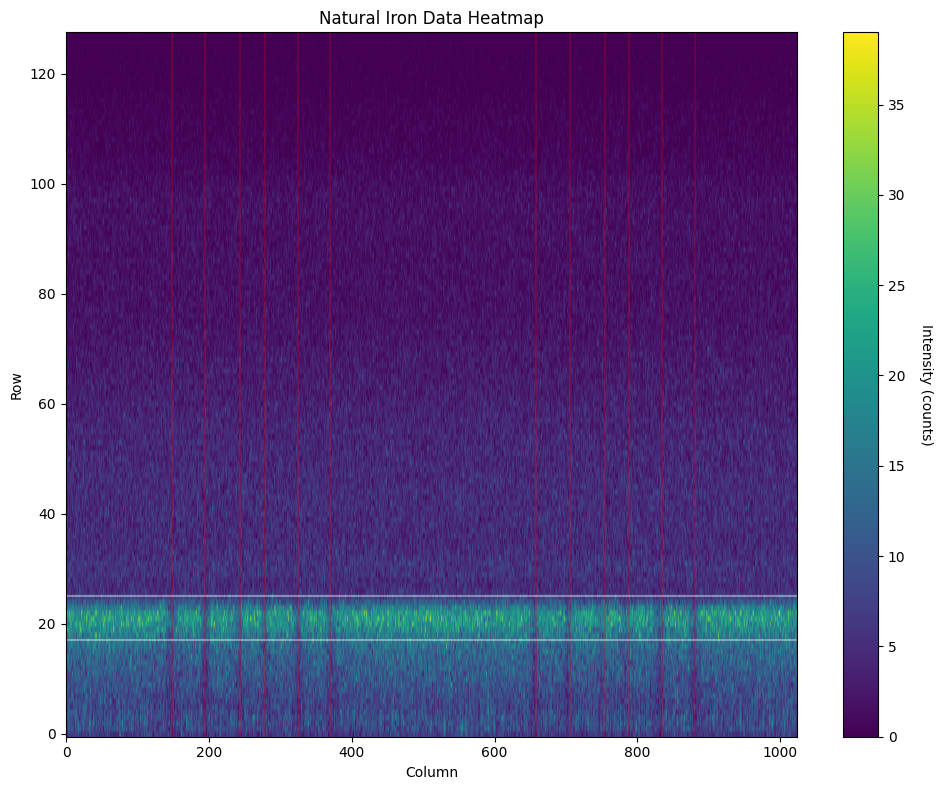

Array shape: (128, 1024)
Intensity range: 0.0 - 39.0


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file line by line to determine structure
with open('data/NaturalIron.txt', 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

# Read as 2D numpy array
data_2d = np.loadtxt('data/NaturalIron.txt').reshape(n_rows, n_cols)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(data_2d, cmap='viridis', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity (counts)', rotation=270, labelpad=20)

# Labels
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Natural Iron Data Heatmap')

plt.tight_layout()
plt.axvline(148, color = 'red', linewidth = 0.3)
plt.axvline(195, color = 'red', linewidth = 0.3)
plt.axvline(244, color = 'red', linewidth = 0.3)
plt.axvline(278, color = 'red', linewidth = 0.3)
plt.axvline(325, color = 'red', linewidth = 0.3)
plt.axvline(370, color = 'red', linewidth = 0.3)

plt.axvline(146+512, color = 'red', linewidth = 0.3)
plt.axvline(193+512, color = 'red', linewidth = 0.3)
plt.axvline(242+512, color = 'red', linewidth = 0.3)
plt.axvline(276+512, color = 'red', linewidth = 0.3)
plt.axvline(323+512, color = 'red', linewidth = 0.3)
plt.axvline(368+512, color = 'red', linewidth = 0.3)

plt.axhline(17,color= "white",alpha=0.4)
plt.axhline(25,color= "white",alpha=0.4)
plt.show()

print(f"Array shape: {data_2d.shape}")
print(f"Intensity range: {data_2d.min()} - {data_2d.max()}")


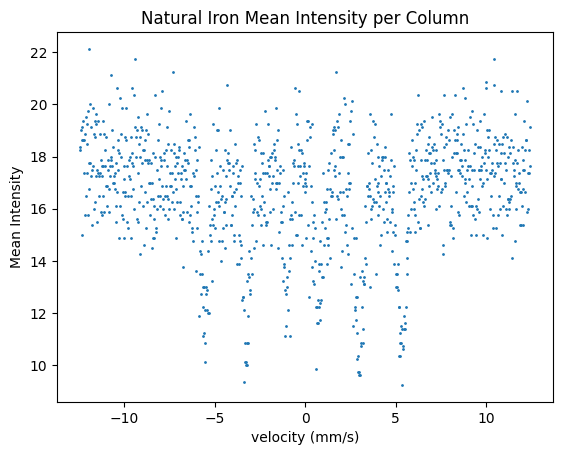

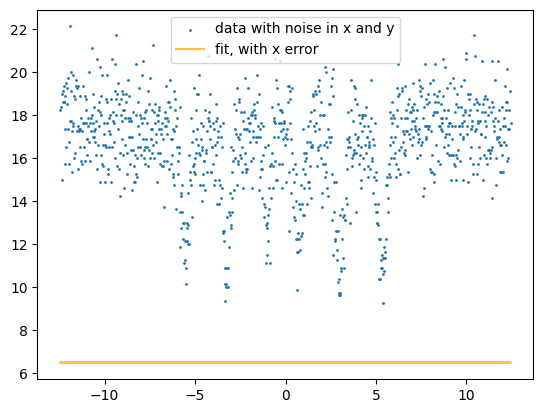

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 1024
    # variables        = 20
    chi-square         = 6341.34715
    reduced chi-square = 6.31608282
    Akaike info crit   = 1907.13570
    Bayesian info crit = 2005.76513
##  Warning: uncertainties could not be estimated:
    amp:     at initial value
    cen:     at initial value
    sig:     at initial value
    sig:     at boundary
    amp2:    at initial value
    cen2:    at initial value
    sig2:    at initial value
    sig2:    at boundary
    amp3:    at initial value
    cen3:    at initial value
    sig3:    at initial value
    sig3:    at boundary
    amp4:    at initial value
    cen4:    at initial value
    sig4:    at initial value
    sig4:    at boundary
    amp5:    at initial value
    cen5:    at initial value
    sig5:    at initial value
    sig5:    at boundary
    amp6:    at initial value
    cen6:    at initial value
    sig6:    at initial value
  

In [34]:
# Calculate mean along axis 0 (rows) for each column
x = np.arange(data_2d[17:25,:].shape[1])
y = np.mean(data_2d[17:25,:], axis=0)

plt.scatter(velocity*10**3, y, s=1)
plt.xlabel('velocity (mm/s)')
plt.ylabel('Mean Intensity')
plt.title('Natural Iron Mean Intensity per Column')
plt.show()

def peak_model(params, x):
    amp = params['amp'].value
    cen = params['cen'].value
    sig = params['sig'].value
    offset = params['offset'].value
    amp2 = params['amp2'].value
    cen2 = params['cen2'].value
    sig2 = params['sig2'].value
    amp3 = params['amp3'].value
    cen3 = params['cen3'].value
    sig3 = params['sig3'].value
    amp4 = params['amp4'].value
    cen4 = params['cen4'].value
    sig4 = params['sig4'].value
    amp5 = params['amp5'].value
    cen5 = params['cen5'].value
    sig5 = params['sig5'].value
    amp6 = params['amp6'].value
    cen6 = params['cen6'].value
    sig6 = params['sig6'].value


    #slope = params['slope'].value
    #model = offset + slope*x +  lorentzian(x, amp, cen, sigma=sig)
    model = offset +  lorentzian(x, amp, cen, sigma=sig) +lorentzian(x, amp2, cen2, sigma=sig2) +lorentzian(x, amp3, cen3, sigma=sig3)+lorentzian(x, amp4, cen4, sigma=sig4)+lorentzian(x, amp5, cen5, sigma=sig5)+lorentzian(x, amp6, cen6, sigma=sig6)

    return model


params = create_params(amp={"value": -5, "min":-8, "max": -3}, cen ={"value":-6e-3, "min": -6.5e-3, "max": -5e-3}, sig={"value": 1, "min": 1e-3, "max": 1}, 
                       amp2={"value":-6, "min":-8, "max": -3}, cen2={"value":-4e-3, "min": -5e-3, "max": -2.7e-3}, sig2={"value": 1, "min": 1e-3, "max": 1}, 
                       amp3={"value":-4, "min":-8, "max": -3}, cen3={"value":-1e-3, "min": -2e-3, "max": 0}, sig3={"value": 1, "min": 1e-3, "max": 1},
                       amp4={"value":-6, "min":-8, "max": -3}, cen4={"value":4e-4,"min":0,"max":2e-3}, sig4={"value" : 1,"min" : 1e-3,"max" : 1},
                       amp5={"value":-6, "min":-8, "max": -3}, cen5={"value":2.5e-3,"min":2.1e-3,"max":4e-3}, sig5={"value" : 1,"min" : 1e-3,"max" : 1},
                       amp6={"value":-6, "min":-8, "max": -3}, cen6={"value":6e-3,"min":5e-3,"max":7e-3}, sig6={"value" : 1,"min" : 1e-3,"max" : 1},
                       slope=0, offset= {"value" : 17 , "min" :15 , "max" : 20})

mini2 = Minimizer(objective_with_xerr, params, fcn_args=(velocity, y, np.sqrt(y), velocity_uncertainty))
result2 = mini2.minimize()

bestfit2 = peak_model(result2.params, velocity)

plt.scatter(velocity*10**3, y,s=1, label='data with noise in x and y')
plt.plot(velocity*10**3, bestfit2, label='fit, with x error',color="orange",alpha=0.7)
plt.legend()
plt.show()

print(report_fit(result2))

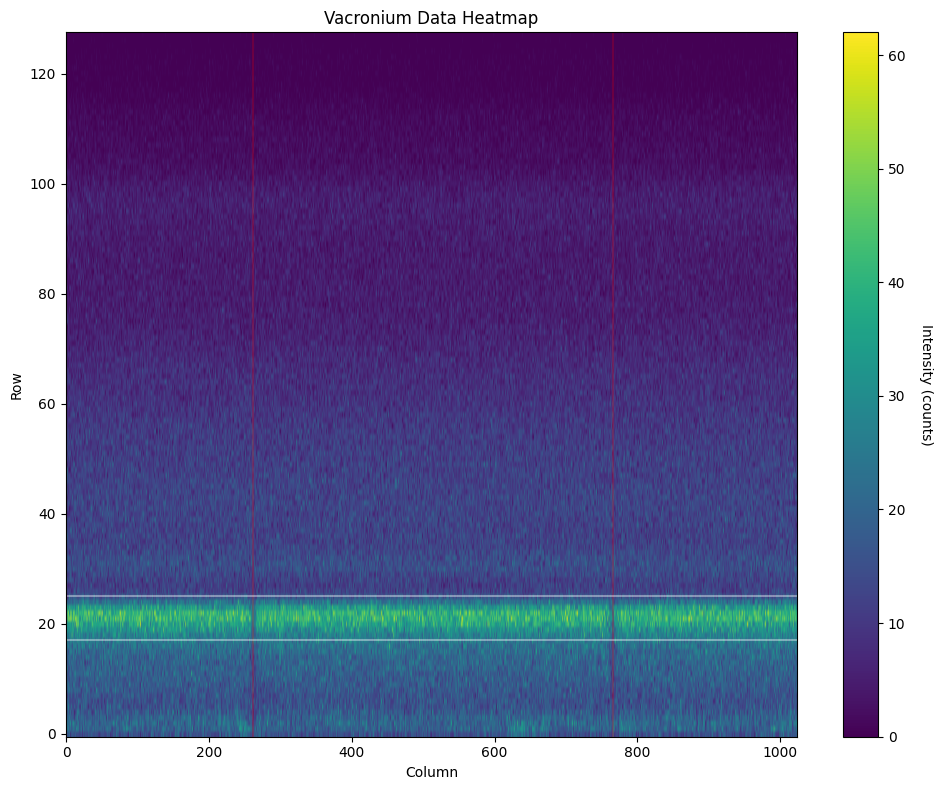

Array shape: (128, 1024)
Intensity range: 0.0 - 62.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file line by line to determine structure
with open('data/StainlessSteel.txt', 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

# Read as 2D numpy array
data_2d = np.loadtxt('data/StainlessSteel.txt').reshape(n_rows, n_cols)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(data_2d, cmap='viridis', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity (counts)', rotation=270, labelpad=20)

# Labels
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Vacronium Data Heatmap')

plt.tight_layout()

plt.axvline(262, color = 'red', linewidth = 0.3)
plt.axvline(254+512, color = 'red', linewidth = 0.3)

plt.axhline(17,color= "white",alpha=0.4)
plt.axhline(25,color= "white",alpha=0.4)
plt.show()

print(f"Array shape: {data_2d.shape}")
print(f"Intensity range: {data_2d.min()} - {data_2d.max()}")


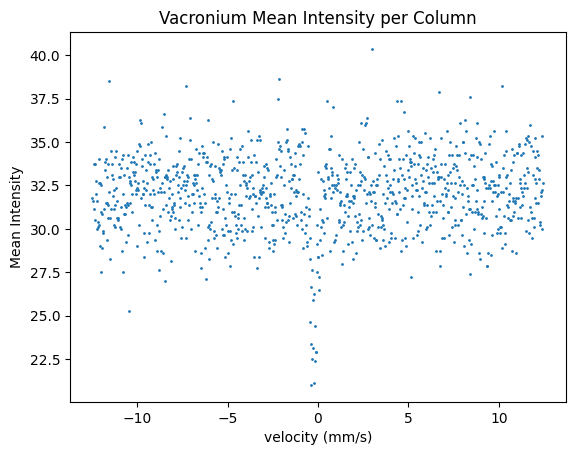

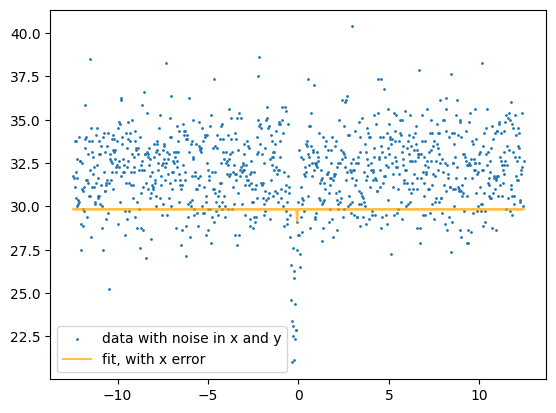

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 80
    # data points      = 83
    # variables        = 5
    chi-square         = 42.4848943
    reduced chi-square = 0.54467813
    Akaike info crit   = -45.5844380
    Bayesian info crit = -33.4902350
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:    -1.81257338 (init = -10)
    cen:    -7.2026e-05 (init = -0.0001)
    sig:    -3.3934e-06 (init = 0.001)
    slope:   0.00000000 (init = 0)
    offset:  29.8310415 (init = 32)
None


In [36]:
# Calculate mean along axis 0 (rows) for each column
y = np.mean(data_2d[17:25,:], axis=0)

plt.scatter(velocity*10**3, y, s=1)
plt.xlabel('velocity (mm/s)')
plt.ylabel('Mean Intensity')
plt.title('Vacronium Mean Intensity per Column')
plt.show()



def peak_model(params, x):
    amp = params['amp'].value
    cen = params['cen'].value
    sig = params['sig'].value
    offset = params['offset'].value
    #slope = params['slope'].value
    #model = offset + slope*x +  lorentzian(x, amp, cen, sigma=sig)
    model = offset +  lorentzian(x, amp, cen, sigma=sig)
    
    return model


params = create_params(amp= -10, cen=-1e-4, sig=1e-3, slope=0, offset=32)

mini2 = Minimizer(objective_with_xerr, params, fcn_args=(velocity[np.where(np.abs(velocity) <0.001)], y[np.where(np.abs(velocity) <0.001)], np.sqrt(y)[np.where(np.abs(velocity) <0.001)], velocity_uncertainty[np.where(np.abs(velocity) <0.001)]))
result2 = mini2.minimize()

bestfit2 = peak_model(result2.params, velocity)

plt.scatter(velocity*10**3, y,s=1, label='data with noise in x and y')
plt.plot(velocity*10**3, bestfit2, label='fit, with x error',color="orange",alpha=0.7)
plt.legend()
plt.show()

print(report_fit(result2))
